In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from pandas import *
from pylab import *

In [2]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False   # 解决保存图像是负号'-'显示为方块的问题

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib inline

In [4]:
df = pd.read_csv('perfume_info1.csv', encoding = 'utf8',index_col=0)

In [5]:
df[['name','x']] = df['name'].str.split("\r\r\r\r\n", expand=True)

In [6]:
df['popularity'] = [i.split(" ")[2] for i in df['rating']]
df['rating'] = [i.split(" ")[0] for i in df['rating']]

In [7]:
df['rating'] = [int(float(i)*10) for i in df['rating']]
df['popularity'] = [int(i) for i in df['popularity']]

In [8]:
df=df[['name','rating','popularity','brand','perfumer','gender','types','scent1','scent2','scent3','scent4','scent5']]

In [9]:
freq=[]
for i in range(0,len(df)):
    a=df['scent1'][i]+' '+df['scent2'][i]+' '+df['scent3'][i]+' '+df['scent4'][i]+' '+df['scent5'][i]
    freq.append(a)
df['frequency']=freq

In [10]:
brand_common=df['brand'].value_counts(ascending=False).head(10)
brand_common

爱马仕     22
香奈儿     17
迪奥      17
娇兰      17
宝格丽     14
祖玛珑     14
圣罗兰      8
博柏利      8
高田贤三     6
浪凡       5
Name: brand, dtype: int64

In [11]:
types_common=df['types'].value_counts(ascending=False)
types_common

木质花香调             19
花香调               19
木质东方调             17
柑橘馥奇香调            15
花香果香调             13
东方花香调             13
木质馥奇香调            12
辛辣木质调             11
花香甘苔调              9
绿叶花香调              8
水生馥奇香调             7
馥奇香调               7
辛辣东方调              5
东方馥奇香调             5
水生花香调              5
果香甘苔调              4
醛香花香调              4
东方美食调              4
东方调                3
木质甘苔调              3
女香                 3
男香                 3
木质调                2
水生木质调              2
Honorine Blanc     1
None               1
花果香美食调             1
果香馥奇香调             1
绿叶馥奇香调             1
柑橘美食调              1
甘苔调                1
Name: types, dtype: int64

In [12]:
df['frequency'] = df['frequency'].str.replace('|',' ')
freq_common = pd.Series(' '.join(df['frequency']).split()).value_counts(ascending=False).head(20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

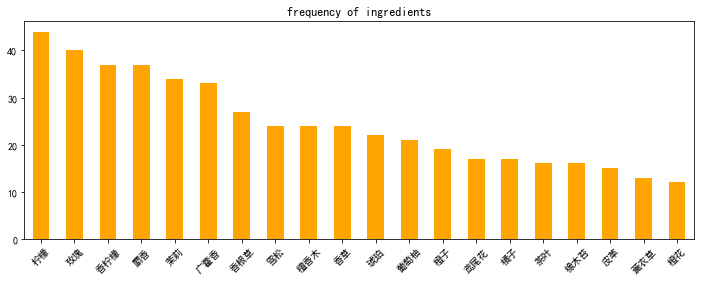

In [13]:
freq_common.plot(kind = 'bar',title='frequency of ingredients',color='orange',figsize=(12,4))
xticks(rotation=45)

In [14]:
list_ = set()
for s in df['frequency'].str.split(' '):
    list_ = set().union(s, list_)
len(list_)

191

In [15]:
a=df[df['types']==u'\u82b1\u9999\u7518\u82d4\u8c03']
aaa = pd.Series(' '.join(a['frequency']).split()).value_counts(ascending=False).head(20)
a

,name,rating,popularity,brand,perfumer,gender,types,scent1,scent2,scent3,scent4,scent5,frequency
8,香奈儿 可可小姐,90,1548,香奈儿,Jacques Polge,女香,花香甘苔调,广藿香,橙子,玫瑰,橘子,香柠檬,广藿香 橙子 玫瑰 橘子 香柠檬
52,香奈儿 邂逅清新（绿邂逅）,86,1387,香奈儿,Jacques Polge,女香,花香甘苔调,柠檬,雪松,凤眼兰,粉红胡椒,广藿香,柠檬 雪松 凤眼兰 粉红胡椒 广藿香
62,蔻依 水漾玫瑰（绿丝带）,87,906,蔻依,Michel Almairac,女香,花香甘苔调,玫瑰,广藿香,葡萄柚,香橼,雪松,玫瑰 广藿香 葡萄柚 香橼 雪松
108,香奈儿 邂逅（黄邂逅）,85,746,香奈儿,Jacques Polge,女香,花香甘苔调,柠檬,广藿香,粉红胡椒,菠萝,茉莉,柠檬 广藿香 粉红胡椒 菠萝 茉莉
122,迪奥小姐,85,527,迪奥,Francois Demachy,女香,花香甘苔调,广藿香,橘子,茉莉,玫瑰,麝香,广藿香 橘子 茉莉 玫瑰 麝香
136,爱马仕 法布街24号,87,351,爱马仕,Maurice Roucel,女香,花香甘苔调,橙花,栀子花,琥珀,风信子,茉莉,橙花 栀子花 琥珀 风信子 茉莉
181,宝缇嘉 同名,87,181,宝缇嘉,Michel Almairac,女香,花香甘苔调,皮革,橡木苔,广藿香,粉红胡椒,茉莉,皮革 橡木苔 广藿香 粉红胡椒 茉莉
182,娇兰 一千零一夜绽放（初次）,85,209,娇兰,Thierry Wasser,女香,花香甘苔调,鸢尾花,香草,焦糖,广藿香,零陵香豆,鸢尾花 香草 焦糖 广藿香 零陵香豆
186,汤姆·福特 白色广藿香,85,187,汤姆·福特,Givaudan,女香,花香甘苔调,广藿香,白色花系,芫荽,牡丹,黄葵,广藿香 白色花系 芫荽 牡丹 黄葵


In [16]:
aaa=df[df['gender']=='女香']
len(aaa)

101

In [17]:
female_common = pd.Series(' '.join(aaa['frequency']).split()).value_counts(ascending=False)

In [18]:
len(female_common)

136

In [19]:
aaa=df[df['gender']=='男香']
len(aaa)

60

In [21]:
# df[df['x'].str.contains('Rouge Eau')]

# scent

In [20]:
G=nx.Graph()
for i in range(len(df)):
    G.add_node(df['name'][i],rating=int(df['rating'][i]),popularity=int(df['popularity'][i]),gender=df['gender'][i],brand=df['brand'][i],types=df['types'][i])

In [21]:
for i in range(len(df)):
    for j in range(i+1,len(df)):
        for a in range(1,6):
            for b in range(1,6):
                if df['scent'+str(a)][i]!="None":
                    if df['scent'+str(b)][i]!="None":
                        if df['scent'+str(a)][i]==df['scent'+str(b)][j]:
                            if (df['name'][i], df['name'][j]) in G.edges():
                                data = G.get_edge_data(df['name'][i], df['name'][j])
                                G.add_edge(df['name'][i], df['name'][j], weight=data['weight']+1)
                            else:
                                G.add_edge(df['name'][i], df['name'][j], weight=1)

In [22]:
edgewidth = [d['weight'] for (u,v,d) in G.edges(data=True)]

In [23]:
for i in edgewidth:
    if i >=4:
        print(i)

4
4
5
4
4


(array([ 5., 12., 21., 40., 22., 24., 36., 24., 10.,  6.]),
 array([ 13. ,  23.5,  34. ,  44.5,  55. ,  65.5,  76. ,  86.5,  97. ,
        107.5, 118. ]),
 <a list of 10 Patch objects>)

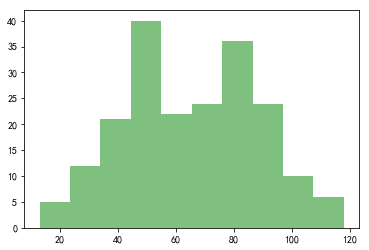

In [24]:
degree=dict(nx.degree(G))
plt.hist(degree.values(),facecolor='green',alpha=0.5)

In [26]:
nx.transitivity(G)

0.5441981730444372

In [ ]:
#nx.write_edgelist(G, './a.txt', comments='#', delimiter=' ', data=True, encoding='utf-8')
nx.write_gexf(G,'graph_with_features.gexf')